<a href="https://colab.research.google.com/github/auchtopus/Herbarium_Anthony/blob/master/blind_scoring_from_directory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General Utilites
import os
import numpy as np
import pandas as pd
import random
import yaml
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = [20, 20]
from PIL import Image
from shutil import copyfile
import shutil
from IPython.display import clear_output
import time

In [ ]:
! git clone https://github.com/auchtopus/NEVP_phenology_unscored_20191206

Cloning into 'NEVP_phenology_unscored_20191206'...
remote: Enumerating objects: 117, done.
remote: Total 117 (delta 0), reused 0 (delta 0), pack-reused 117
Receiving objects: 100% (117/117), 797.03 MiB | 15.22 MiB/s, done.
Checking out files: 100% (114/114), done.


In [ ]:
with open("/content/NEVP_phenology_unscored_20191206/blind_scoring_from_directory.yaml", "r") as input_stream: 
    settings = yaml.load(input_stream)
# # image_dir = f'{settings["image_dir"]}'
# # output_dir = f'{settings["output_dir"]}'
# # log_path = f'{settings["log_path"]}'


image_dir = '/content/NEVP_phenology_unscored_20191206/images'
log_path = '/content/NEVP_phenology_unscored_20191206/patrick_scoring_dataset_2.csv'

status_list = ["Reproductive", "Flowering", "Fruiting", "Budding"]

scoring_df = pd.read_csv(log_path)


######
# Added for hosting on Colab
scoring_df["Filepath"] = scoring_df.apply(lambda row: f"{image_dir}/{row['Filename']}", axis=1)
######
print(len(scoring_df))
scoring_df.head(10)



# New Section

number of images scored: 99
/content/NEVP_phenology_unscored_20191206/images/2477112.jpg


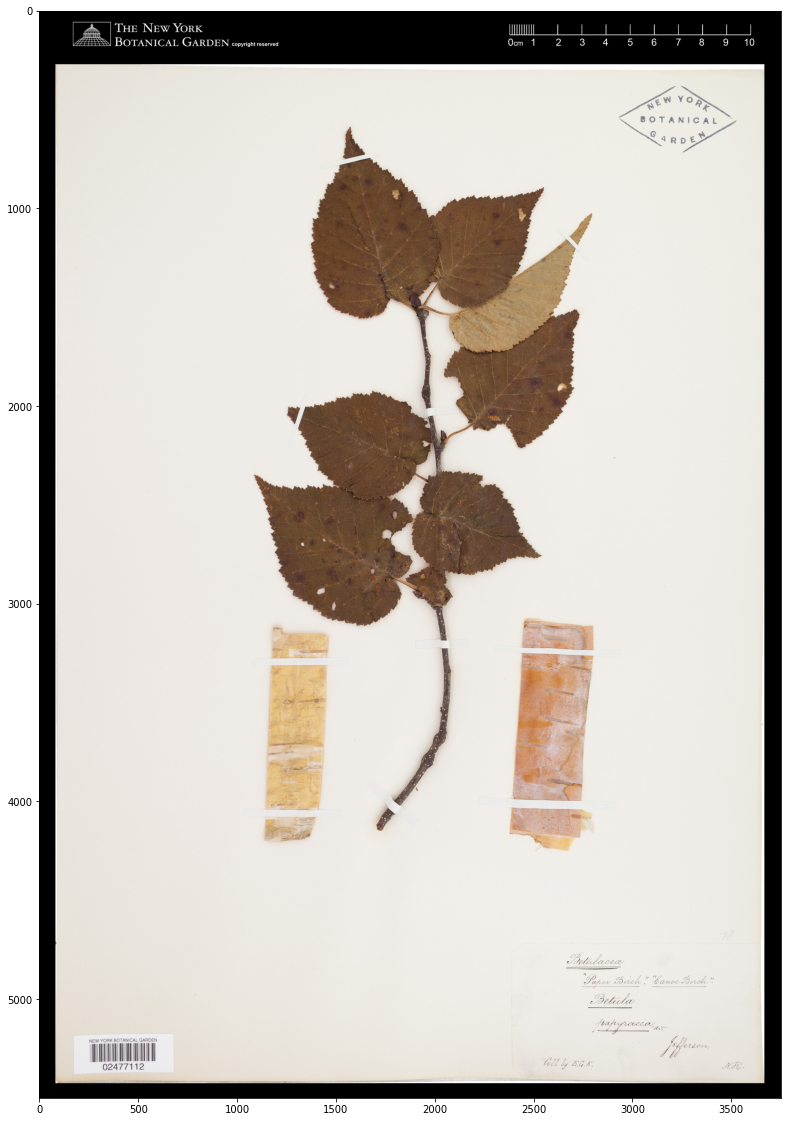

<Figure size 16000x16000 with 0 Axes>

Is this image scorable? Hit ENTER if it is scorable, 0 if Non-scorable

Image is scorable. Continuing...
Is this image Reproductive? Enter 1 if yes, 2 if no, 0 if non-scorable
2
Is this image Flowering? Enter 1 if yes, 2 if no, 0 if non-scorable
2
Is this image Fruiting? Enter 1 if yes, 2 if no, 0 if non-scorable
2
Is this image Budding? Enter 1 if yes, 2 if no, 0 if non-scorable
2
Finished 100 images! Thank you!


In [ ]:
matplotlib.rcParams['figure.figsize'] = [20, 20]
for index, row in scoring_df.iterrows():
    # to resume at where you left off
    if scoring_df.loc[index, "Scored"]:
        continue
    if index > int(settings["num_images"])-1:
        print(f"Finished {settings['num_images']} images! Thank you!")
        break
    clear_output(wait=True)
    print(f"number of images scored: {index}")
    filename = row['Filepath']
    print(filename)
    im = mpimg.imread(filename)
    plt.imshow(im)
    plt.figure(dpi=800)
    plt.show()
    while True:
      try:
        answer = int(input(f"Is this image scorable? Hit ENTER if it is scorable, 0 if Non-scorable\n"))
        if answer is 0:
          scoring_df.loc[index, "Scorable"] = False
          scoring_df.loc[index, "Scored"] = True
          scoring_df.to_csv(log_path)
          print("Image is not scorable. Getting next image...")
          time.sleep(1)
          break
      except ValueError:
          print("Image is scorable. Continuing...")
          time.sleep(1)
          scoring_df.loc[index, "Scorable"] = True
          break
    
    if not scoring_df.loc[index, "Scorable"]:
      continue

    for status in status_list:
        while True:
            try: 
                answer = int(input(f"Is this image {status}? Enter 1 if yes, 2 if no, 0 if non-scorable\n"))
                if answer == 1:
                    answer = True
                elif answer == 2:
                    answer = False
                elif answer == 0:
                    answer = float('Nan')
                else: 
                    raise ValueError
                break
            except ValueError:
                print("Input was not 1 or 2, try again...")
        scoring_df.loc[index, f"{status} Status"] = answer
    scoring_df.loc[index, "Scored"] = True
    scoring_df.to_csv(log_path)

    
    

# New Section